In [76]:
import numpy as np
from diffractio import mm, um, degrees
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
import matplotlib.pyplot as plt
from math import pi
from PIL import Image

# Setting up
length = 1 * mm
num_data = 512
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.633 * um

# 'amplitude', 'intensity', 'phase', 'field', 'real_field', 'contour'
kind='intensity'  # 'field'
logarithm=True

(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f0ceb58b220>)

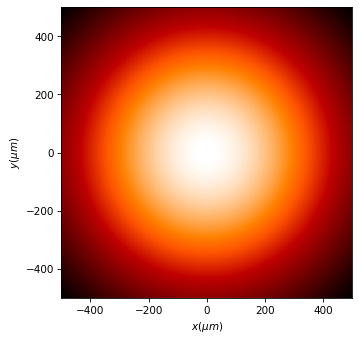

In [64]:
# Gaussian Beam Source - like a LASER
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.gauss_beam(r0=(0, 0), w0=(800 * um, 800 * um), z0=0.0)
# u0.plane_wave()
# u0.u = np.ones((num_data, num_data))*0.1
u0.draw(kind=kind, logarithm=logarithm)

(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f0ceb4063e0>)

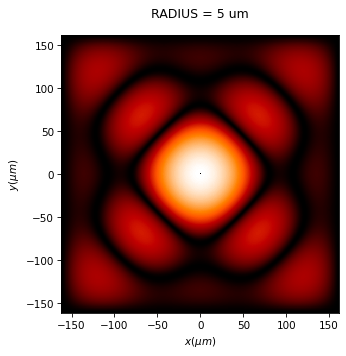

In [65]:
# pin hole
r = 5  # um
varSlit = Scalar_mask_XY(x0, y0, wavelength)
varSlit.circle(
	r0=(0 * um, 0 * um),
	radius=(r * um, r * um),
)
a_varSlit = (u0 * varSlit).fft(z=1 * mm, new_field=True)
a_varSlit.draw(title=f" RADIUS = {r} um ", kind=kind, logarithm=logarithm)

(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f0ceb4da260>)

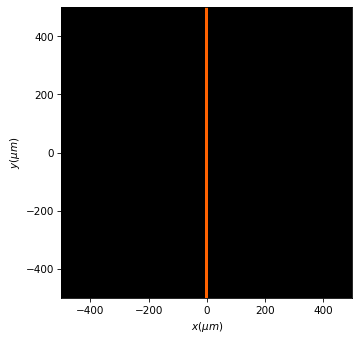

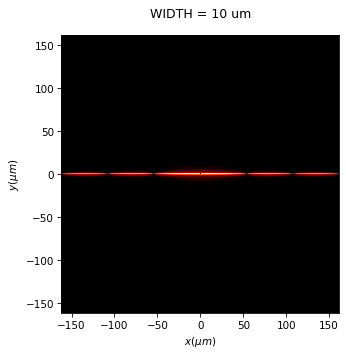

In [66]:
# single slit experiment
width = 10  # um
varSlit = Scalar_mask_XY(x0, y0, wavelength)
varSlit.slit(
	x0=0 * um,
	size=width * um
)

varSlit.draw(kind=kind, logarithm=logarithm)

a_varSlit = (u0 * varSlit).fft(z=1 * mm, new_field=True)
a_varSlit.draw(title=f" WIDTH = {width} um ", kind=kind, logarithm=logarithm)

(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f0ceb3d6fb0>)

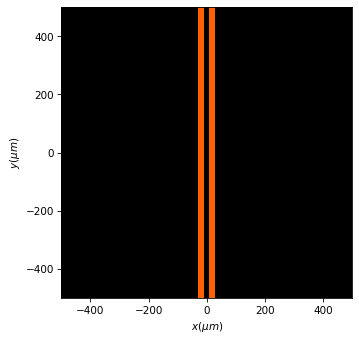

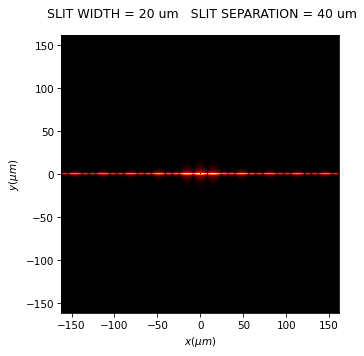

In [67]:
# double slit experiment
slit_width = 20  # um
slit_separation = 40  # um
varSlit = Scalar_mask_XY(x0, y0, wavelength)

varSlit.double_slit(
    x0=0 * um,
    size = slit_width * um,
    separation = slit_separation * um
)

# plt.imshow(varSlit.u, cmap='gray')
varSlit.draw(kind=kind, logarithm=logarithm)

a_varSlit = (u0 * varSlit).fft(z=1 * mm, new_field=True)
a_varSlit.draw(title=f" SLIT WIDTH = {slit_width} um   SLIT SEPARATION = {slit_separation} um", kind=kind, logarithm=logarithm)

(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f0ceb279b70>)

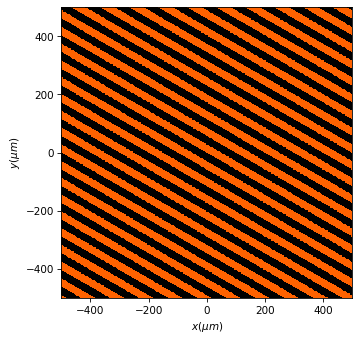

In [68]:
# grating
grating = Scalar_mask_XY(x0, y0, wavelength)
grating.ronchi_grating(
    x0=0 * um,
    period=50 * um,
    angle=pi/3,
)
grating.draw(kind=kind, logarithm=logarithm)

((<matplotlib.image.AxesImage at 0x7f0ceb24b250>,
  <matplotlib.image.AxesImage at 0x7f0ceb24ae30>),
 None,
 None)

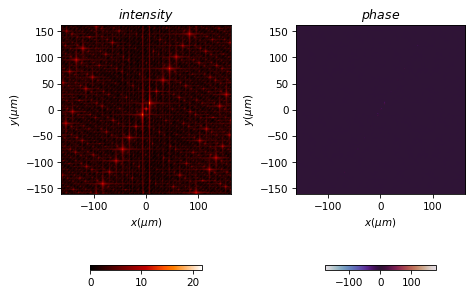

In [69]:
a_L1 = (u0 * grating).fft(z=1 * mm, new_field=True)
a_L1.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x7f0ceb1d9810>,
  <matplotlib.image.AxesImage at 0x7f0ceb0a9a20>),
 None,
 None)

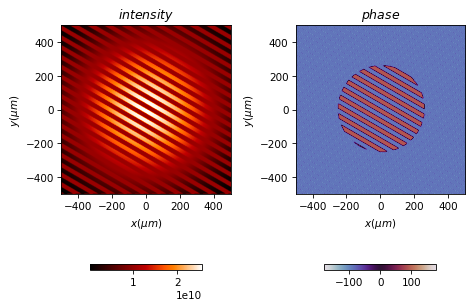

In [70]:
a_L2 = a_L1.fft(z=1 * mm, shift=False, remove0=False, new_field=True)
a_L2.draw(kind='field', logarithm=False)

(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f0ceb249d80>)

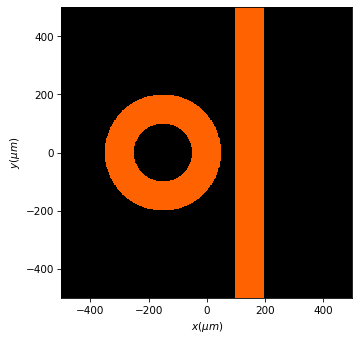

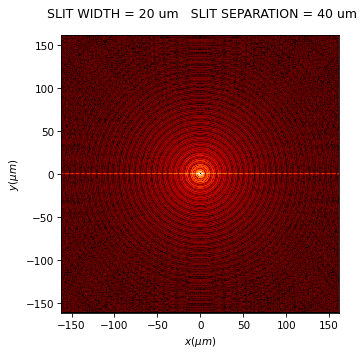

In [71]:
# ring slit experiment

r1 = 100  # um
r2 = 200  # um

varSlit_i = Scalar_mask_XY(x0, y0, wavelength)
varSlit_o = Scalar_mask_XY(x0, y0, wavelength)

varSlit_i.slit(
    x0=150 * um,
    size=r1 * um
)

varSlit_o.ring(
    r0 = (-150 * um, 0 * um),
    radius1 = (r1 * um, r1 * um),
    radius2 = (r2 * um, r2 * um)
)

varSlit = Scalar_mask_XY(x0, y0, wavelength)
varSlit.u = varSlit_o.u + varSlit_i.u

varSlit.draw(kind=kind, logarithm=logarithm)

a_varSlit = (u0 * varSlit).fft(z=1 * mm, new_field=True)
a_varSlit.draw(title=f" SLIT WIDTH = {slit_width} um   SLIT SEPARATION = {slit_separation} um", kind=kind, logarithm=logarithm)

(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f0ceb48f310>)

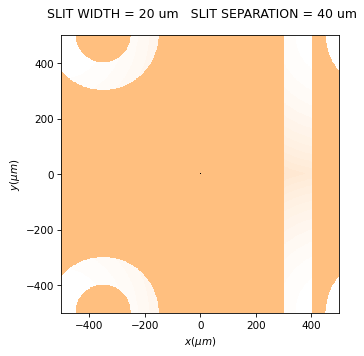

In [72]:
a_varSlit2 = a_varSlit.fft(z=1 * mm, new_field=True)
a_varSlit2.draw(title=f" SLIT WIDTH = {slit_width} um   SLIT SEPARATION = {slit_separation} um", kind=kind, logarithm=logarithm)

(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f0cf0a0d390>)

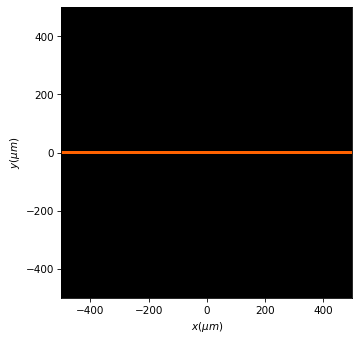

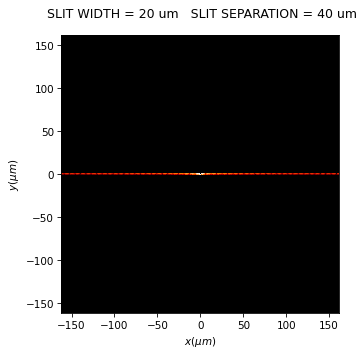

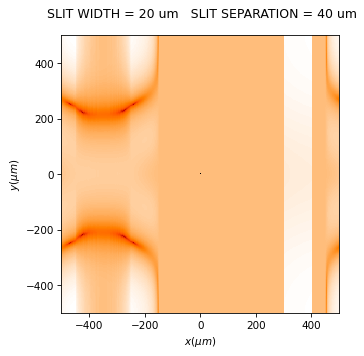

In [73]:

width = 7  # um
mask = Scalar_mask_XY(x0, y0, wavelength)
mask.slit(
    x0=0 * um,
    size=width * um,
    angle=pi/2
)

mask.draw(kind=kind, logarithm=logarithm)

# mask.u = 1 - mask.u

a_varSlit = a_varSlit * mask
a_varSlit.draw(title=f" SLIT WIDTH = {slit_width} um   SLIT SEPARATION = {slit_separation} um", kind=kind, logarithm=logarithm)
a_varSlit2 = a_varSlit.fft(z=1 * mm, new_field=True)
a_varSlit2.draw(title=f" SLIT WIDTH = {slit_width} um   SLIT SEPARATION = {slit_separation} um", kind=kind, logarithm=logarithm)

In [74]:
plt.imshow(mask.u[])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1289741310.py, line 1)

In [86]:
img=Image.open('img1.jpg')

# resize image
img.thumbnail((num_data, num_data))

# crop image to square shape
width, height = img.size
if width > height:
   left = (width - height) / 2
   right = (width + height) / 2
   top = 0
   bottom = height
else:
   left = 0
   right = width
   top = (height - width) / 2
   bottom = (height + width) / 2
img = img.crop((left, top, right, bottom))

a = np.array(img)/256

In [87]:
a

array([[0.42578125, 0.421875  , 0.41796875, ..., 0.14453125, 0.1484375 ,
        0.15234375],
       [0.40234375, 0.3984375 , 0.39453125, ..., 0.15234375, 0.16796875,
        0.15234375],
       [0.37890625, 0.37890625, 0.3828125 , ..., 0.17578125, 0.18359375,
        0.16796875],
       ...,
       [0.15234375, 0.1640625 , 0.1796875 , ..., 0.27734375, 0.2578125 ,
        0.2265625 ],
       [0.15625   , 0.15625   , 0.1875    , ..., 0.23046875, 0.2265625 ,
        0.23828125],
       [0.1328125 , 0.125     , 0.16796875, ..., 0.23828125, 0.23828125,
        0.26171875]])

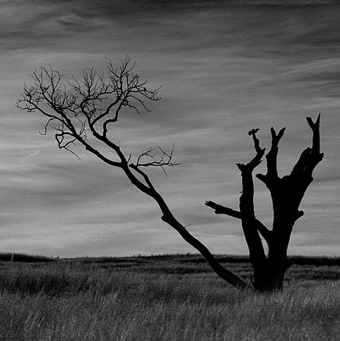

In [88]:
img

(341, 340)


ValueError: operands could not be broadcast together with shapes (512,512) (341,340) 

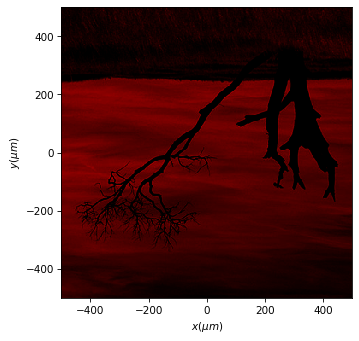

In [91]:
# double slit experiment
slit_width = 20  # um
slit_separation = 40  # um
varSlit = Scalar_mask_XY(x0, y0, wavelength)

varSlit.u = a
print(a.shape)

# plt.imshow(varSlit.u, cmap='gray')
varSlit.draw(kind=kind, logarithm=logarithm)

a_varSlit = (u0 * varSlit).fft(z=1 * mm, new_field=True)
a_varSlit.draw(title=f" SLIT WIDTH = {slit_width} um   SLIT SEPARATION = {slit_separation} um", kind=kind, logarithm=logarithm)